本文来介绍另一款生产级AI应用维护平台：LangFuse，它是开源的，是LangSmith 的平替，并且它可集成 LangChain，同时也可直接对接 OpenAI API。

官方网站：https://langfuse.com/

项目地址：https://github.com/langfuse

# 0. 环境准备
（1）先注册，登录，官网地址在上面

（2）创建Project

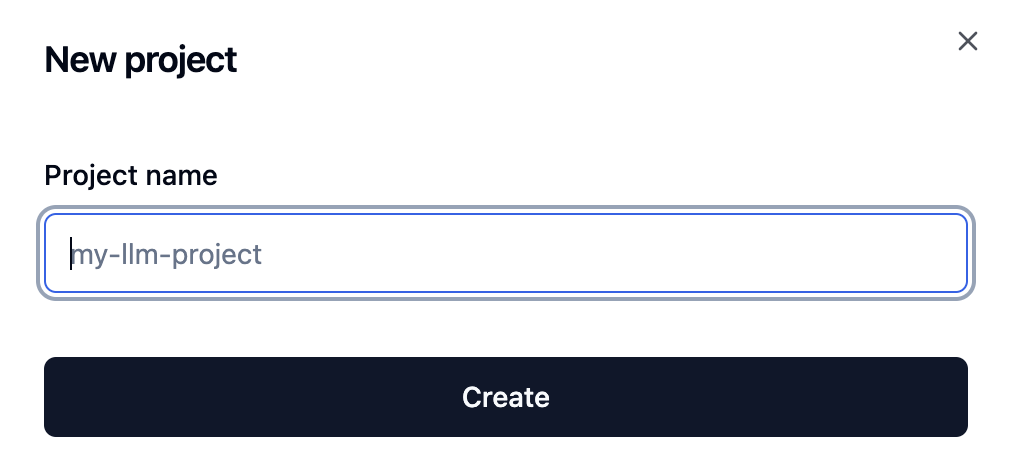

（3）生成私钥和公钥

（4）本地安装 langfuse

In [1]:
!pip install langfuse openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [2]:
# 设置OpenAI KEY环境变量
import os
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

OpenAI API Key:··········


# 1. 开始使用
LangFuse有两种集成方式：

OpenAI API集成

LangChain集成

在运行之前，先将你的公钥和私钥放到环境变量中。例如.env文件中加入：

In [ ]:
# 把如下内容加入到.env文件中，也可以使用如下方式添加环境变量
LANGFUSE_SECRET_KEY = "sk-lf-xxxxx"
LANGFUSE_PUBLIC_KEY = "pk-lf-xxxxx"

In [3]:
# 添加私钥
os.environ['LANGFUSE_SECRET_KEY'] = getpass.getpass('LANGFUSE_SECRET_KEY:')

LANGFUSE_SECRET_KEY:··········


In [4]:
# 添加公钥
os.environ['LANGFUSE_PUBLIC_KEY'] = getpass.getpass('LANGFUSE_PUBLIC_KEY')

LANGFUSE_PUBLIC_KEY··········


这样才能使你的程序与你在LangFuse官网上建立的跟踪项目链接起来。

## 1.1 OpenAI API集成方式
集成步骤：

（1）引入langfuse中的openai：from langfuse.openai import openai，用这个才能集成langfuse

（2）使用Langfuse实例的trace函数，传入一些个人和项目信息

（3）openai接口调用，多了一个trace_id参数

In [5]:
from datetime import datetime
from langfuse.openai import openai ## 1. 引入langfuse中的openai
from langfuse import Langfuse
import os

## 2. 使用Langfuse实例的trace函数，传入一些个人和项目信息
trace = Langfuse().trace(
    name = "hello-world",
    user_id = "Arron",
    release = "v0.0.1"
)

completion = openai.chat.completions.create(
  name="hello-world",
  model="gpt-3.5-turbo",
  messages=[
      {"role": "user", "content": "对我说'Hello, World!'"}
  ],
  temperature=0,
  trace_id=trace.id, ## 3. openai接口调用，多了一个trace_id参数
)

print(completion.choices[0].message.content)

## 输出：Hello, World!

Hello, World!


运行之后,看下LangFuse平台的调用情况

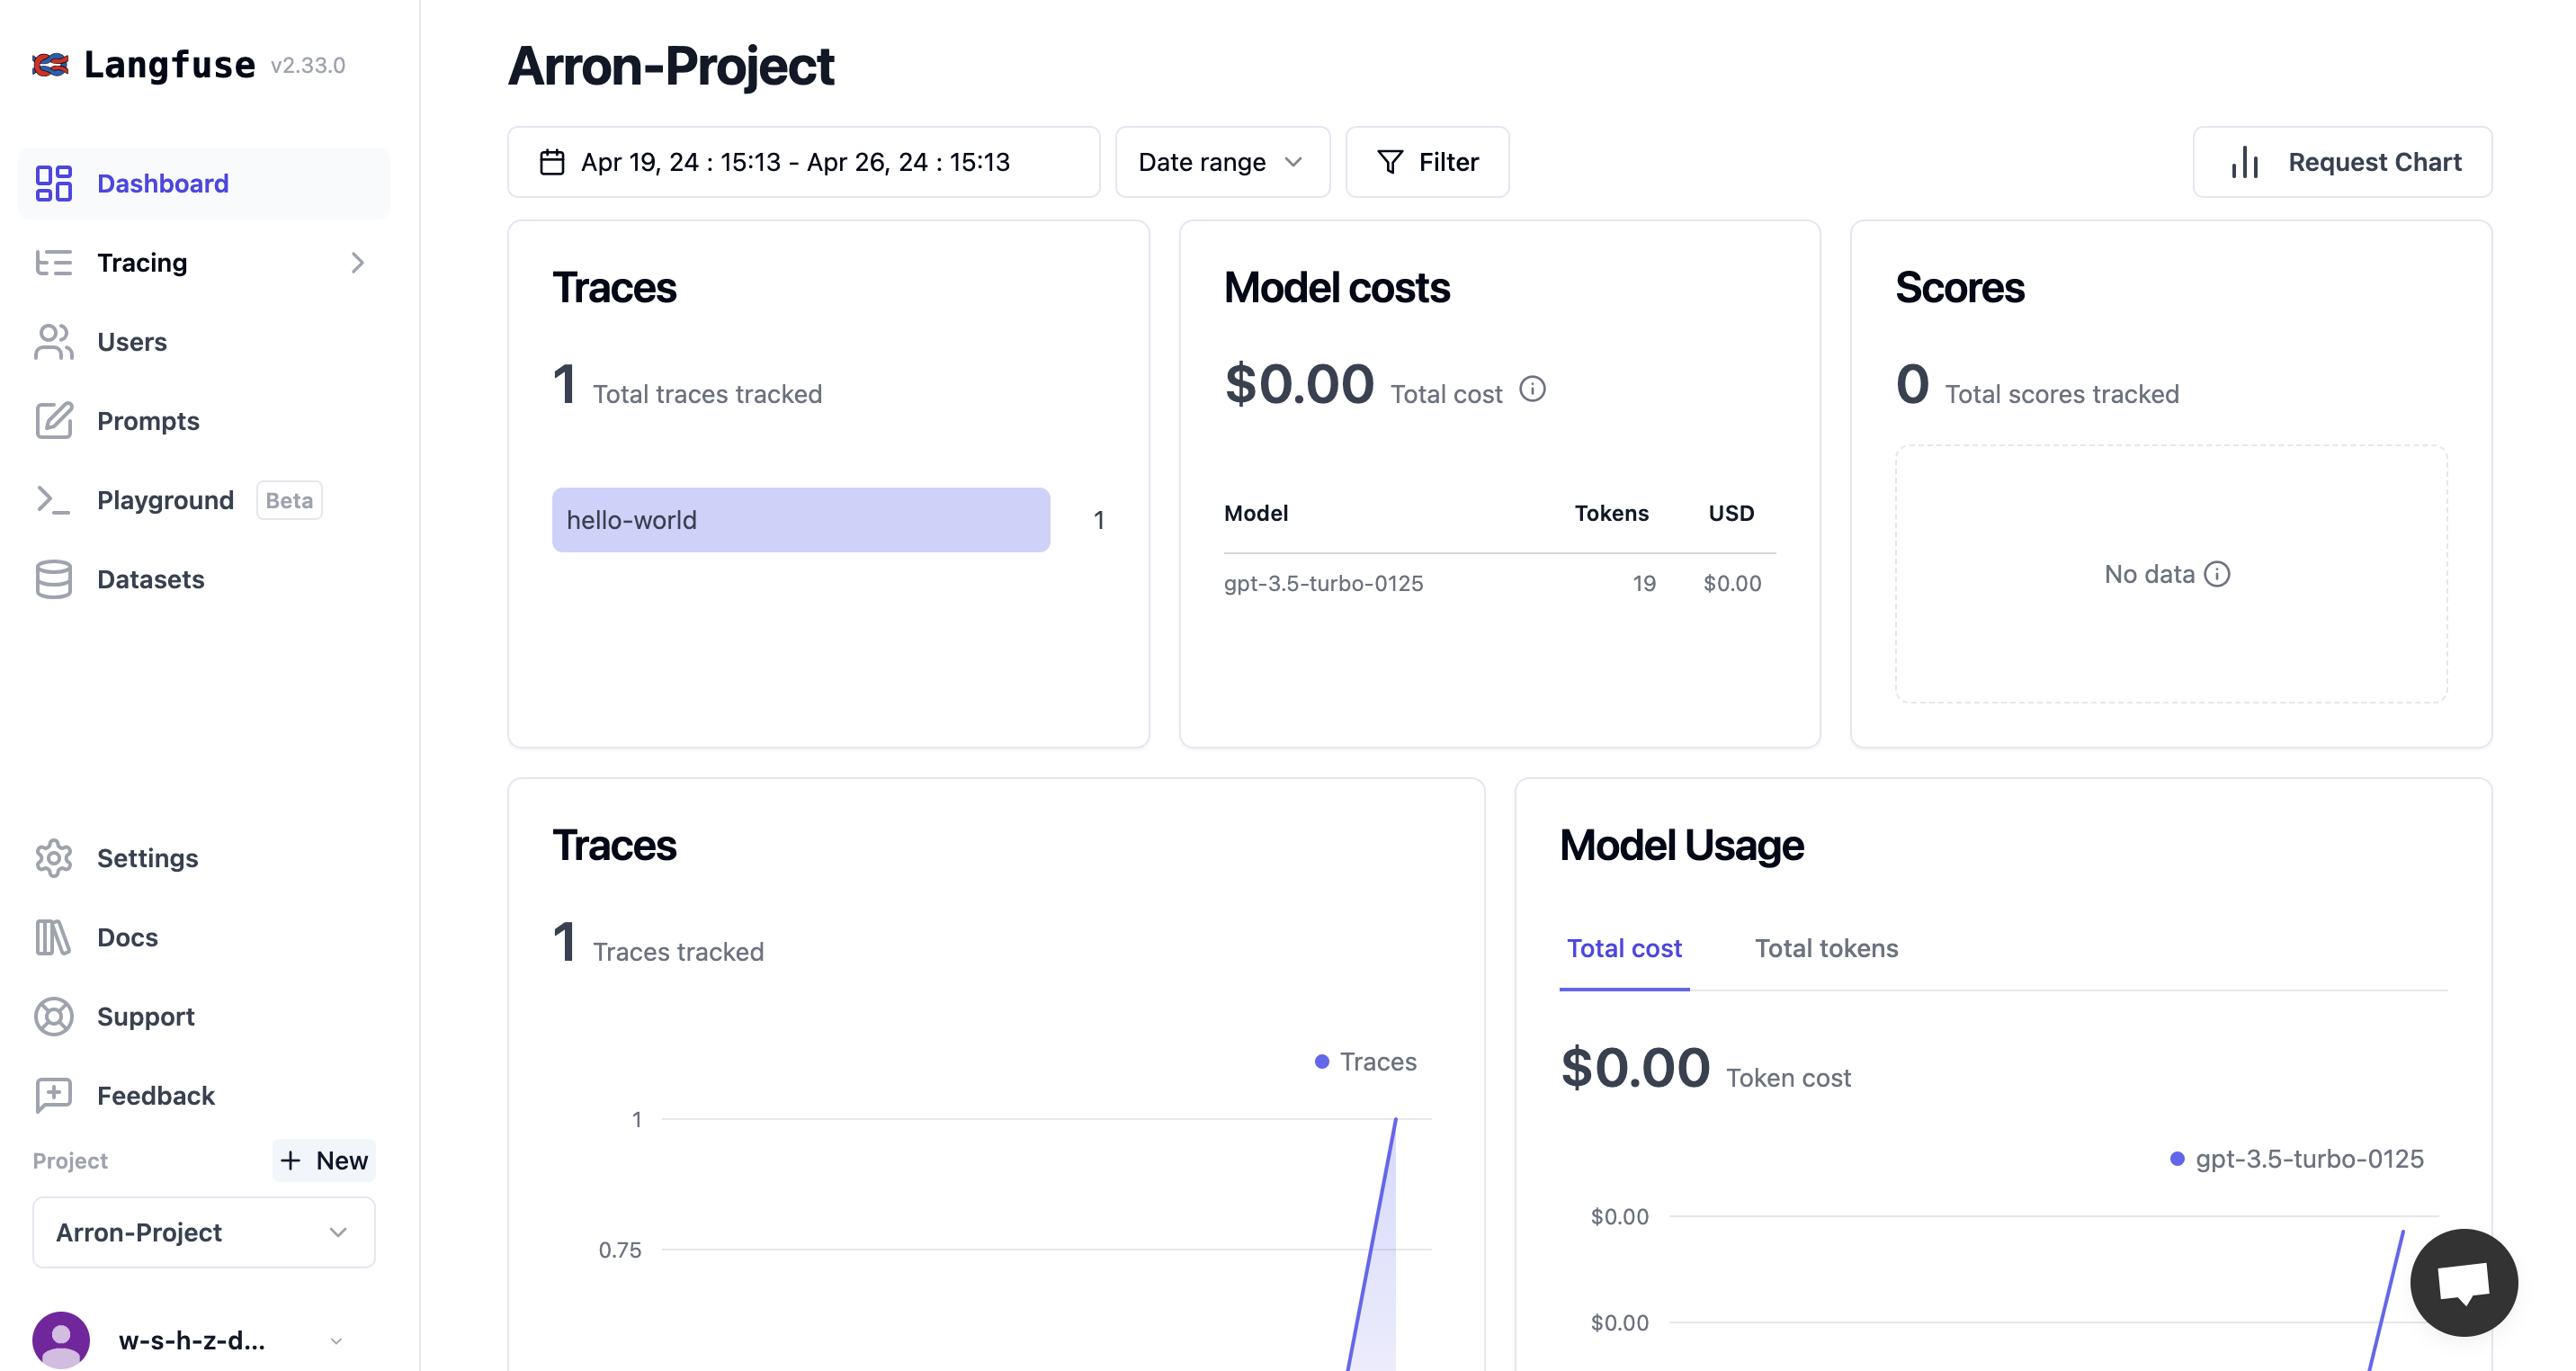

## 1.2 LangChain集成方式
通过 LangChain 的回调集成。

集成步骤：

（1）从langfuse中引入CallbackHandler：from langfuse.callback import CallbackHandler

（2）在CallbackHandler中设置个人和项目信息

（3）正常创建LangChain应用和流程

（4）invoke时，将CallbackHandler填入config参数中：config={"callbacks":[handler]}

In [6]:
!pip install langchain langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.9 MB/s eta 0:00:00


In [7]:
from langfuse.callback import CallbackHandler

handler = CallbackHandler(
    trace_name="SayHello",
    user_id="Arron",
)

from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema import HumanMessage
from langchain.prompts.chat import HumanMessagePromptTemplate
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(model="gpt-3.5-turbo-0613")

prompt_template = """
我的名字叫【{name}】，我的个人介绍是【{description}】。
请根据我的名字和介绍，帮我想一段有吸引力的自我介绍的句子，以此来吸引读者关注和点赞我的账号。
"""
prompt = ChatPromptTemplate.from_messages([
    HumanMessagePromptTemplate.from_template(prompt_template)
])

# 定义输出解析器
parser = StrOutputParser()

chain = (
    {"name":RunnablePassthrough(), "description":RunnablePassthrough() } ## 这里是给prompt的输入，两个参数
    | prompt
    | model
    | parser
)

## invoke的第一个参数，传入json格式的参数，key与prompt中的参数名一致
response = chain.invoke({'name': 'Arron', 'description': '热爱AI，持续学习，持续干货输出'}, config={"callbacks":[handler]})
print(response)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


大家好，我是Arron，一个热爱AI的学习者，不仅如此，我还持续输出干货。无论是深入探讨AI技术的最新进展，还是分享实用的学习方法，我都努力为大家提供有价值的内容。如果你也对AI充满热情，想要不断学习和成长，那么请关注我的账号，我们一起探索AI的无限可能！


运行之后看下LangFuse平台，应该能看到你的项目和调用了。

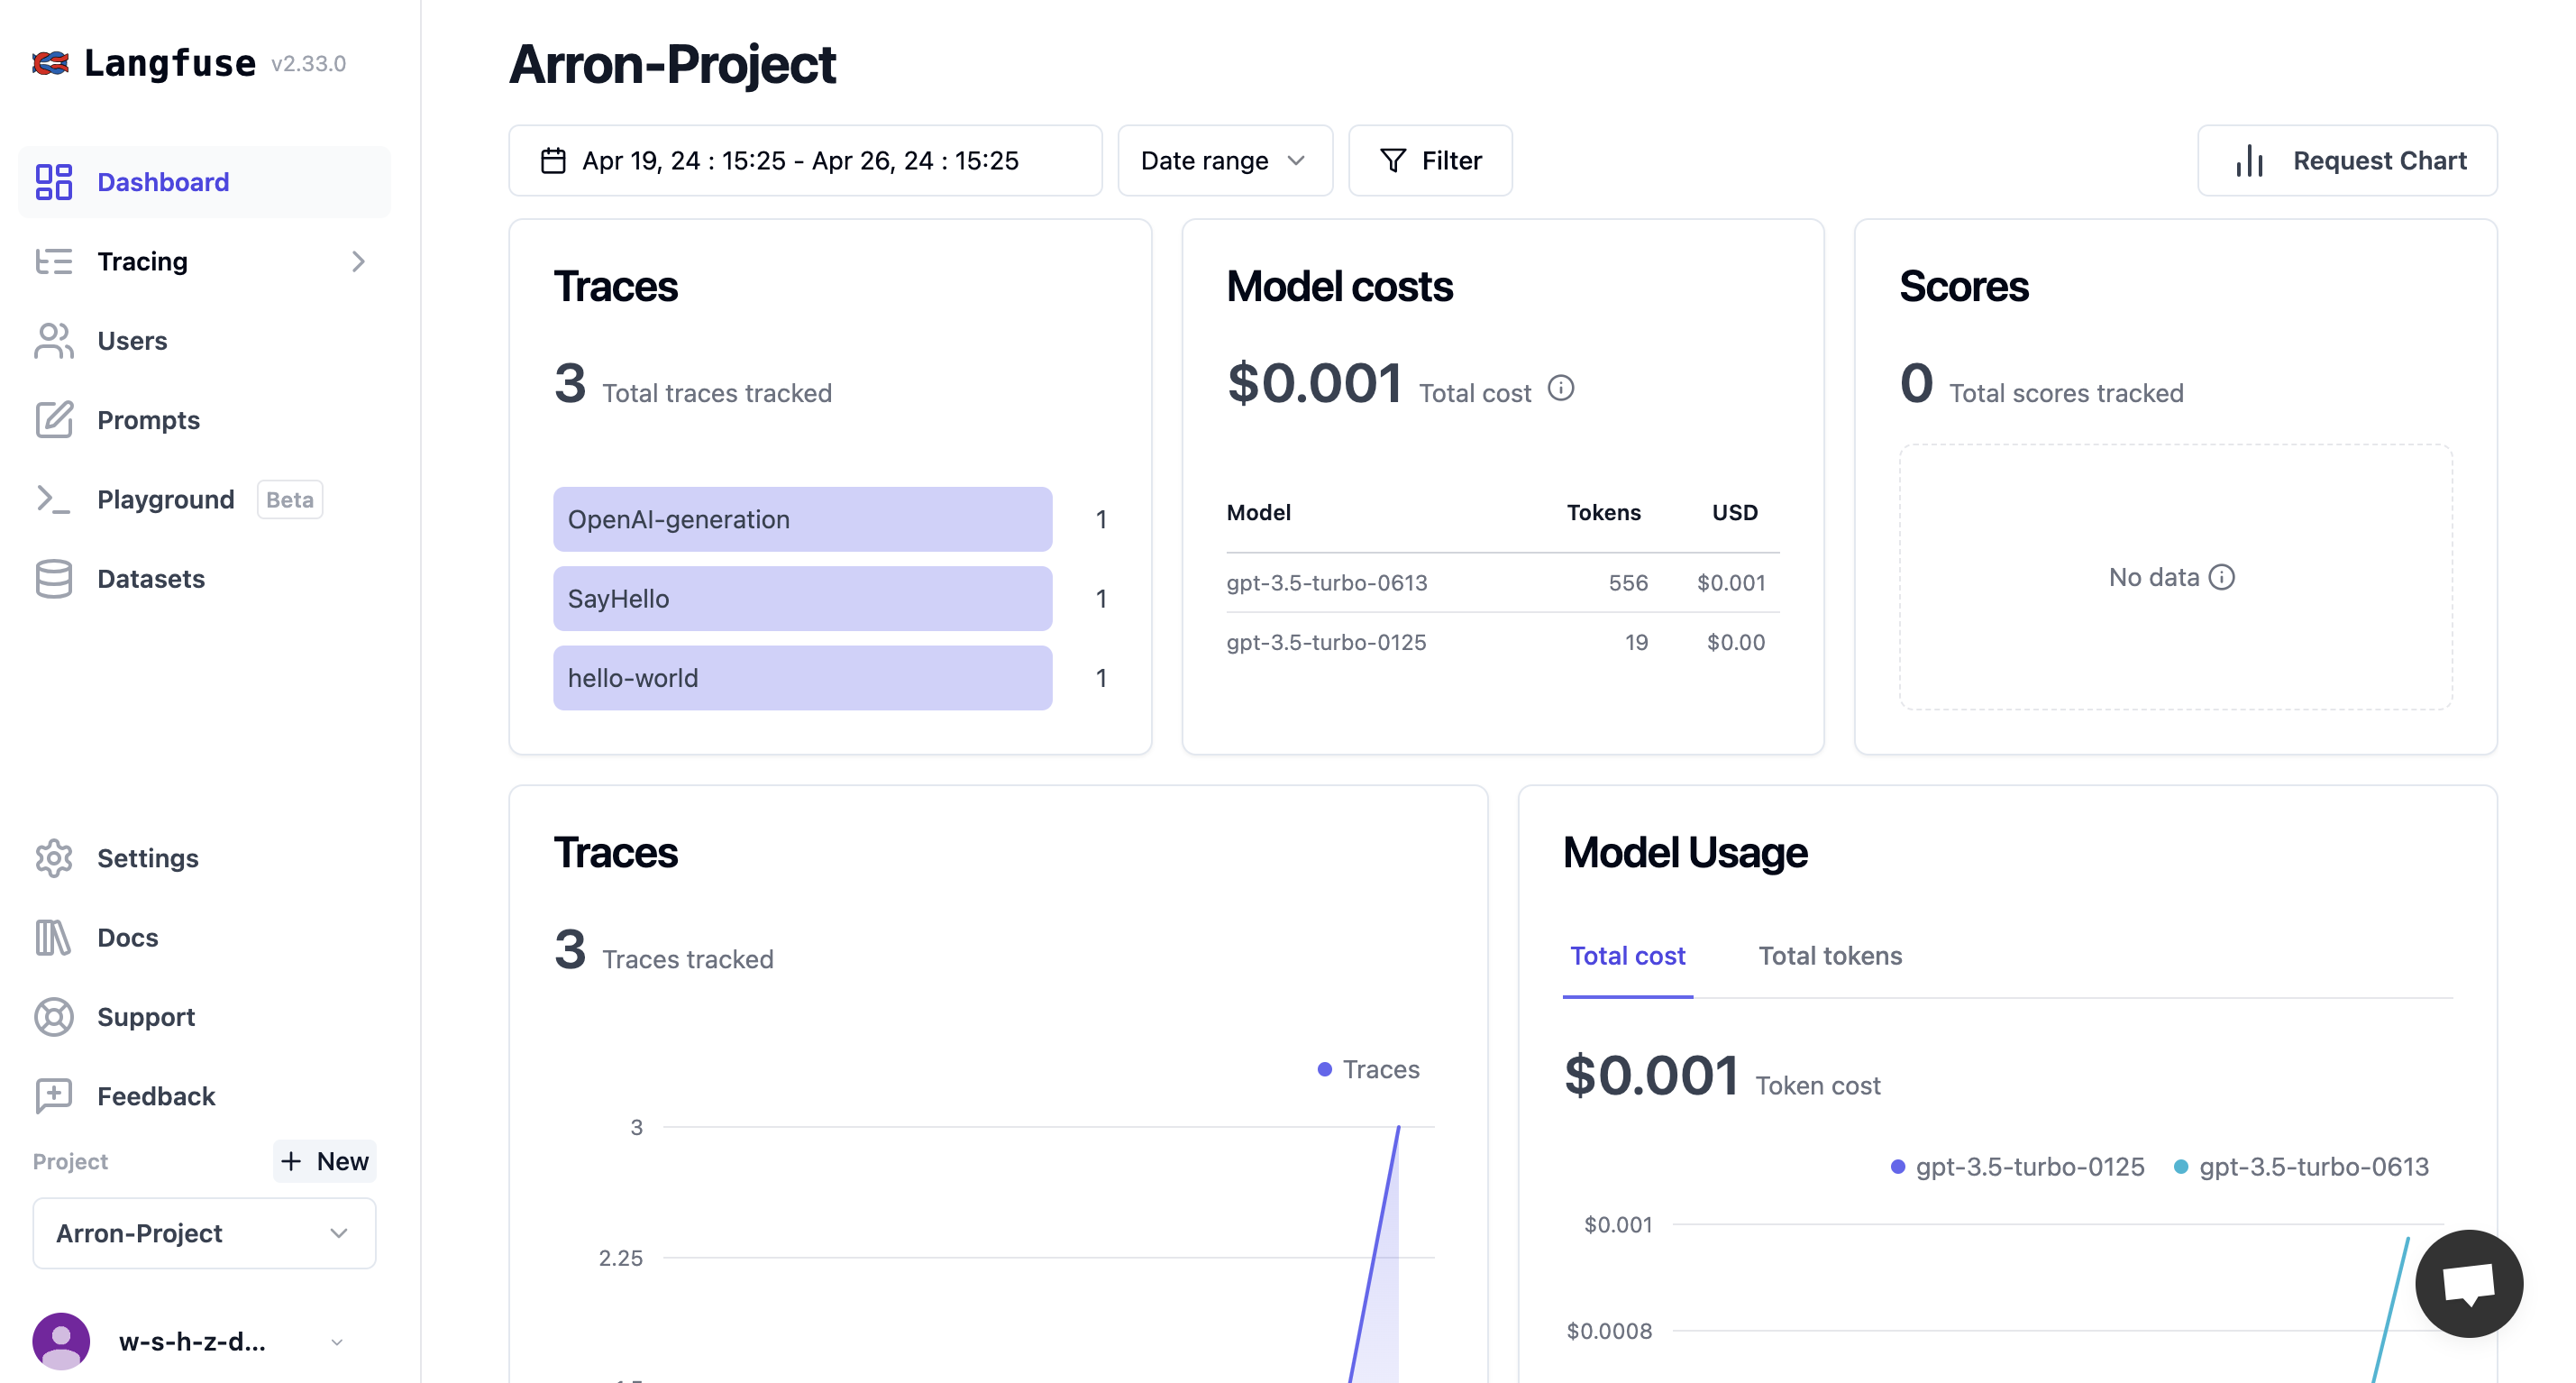

# 2. 详细信息查看 - Traces页面
使用Traces页面，可以看到你每次程序运行的详细过程，包括每一步的输入、输出、耗时、token数等。

（1）进入Traces，可以看到你所有的运行目录。

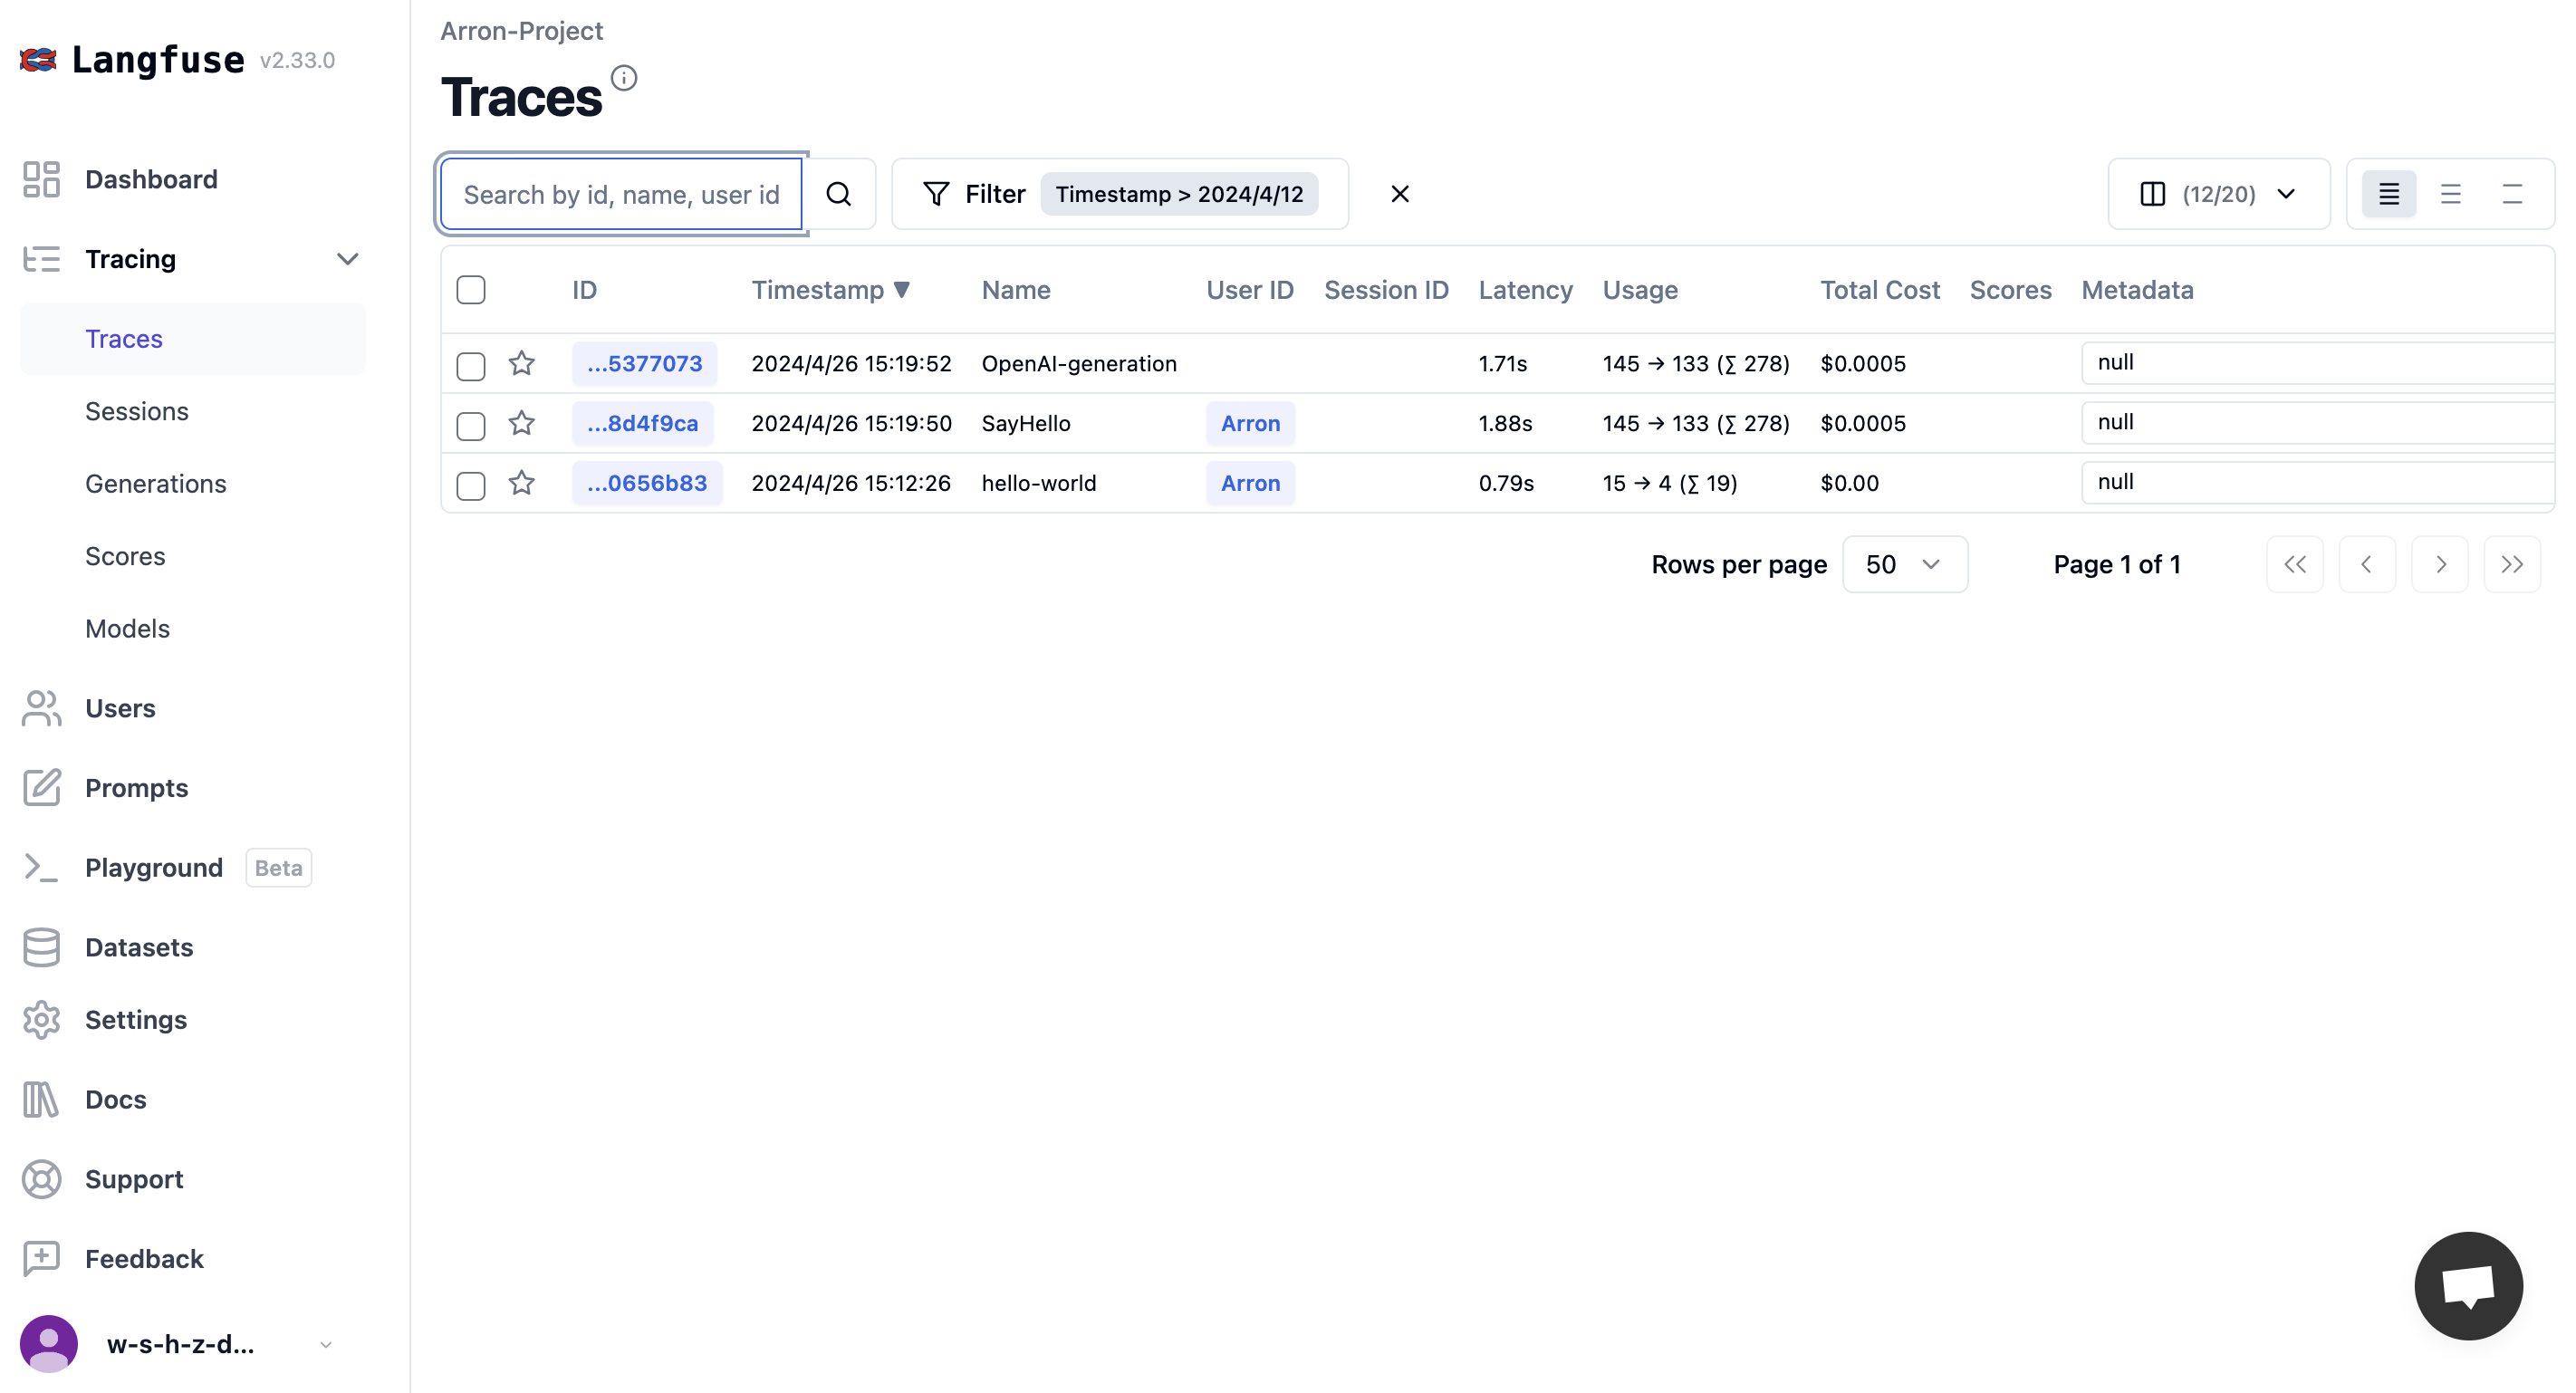


（2）点击上方的任一ID，可以进入到本次运行的详细跟踪页面。该页面包含了本次运行的过程：详细执行步骤（右侧）。点击任一步骤，可以在左侧看到本步骤的输入和输出，以及耗时和token数（图中的145->133表示输入145token，输出133token）。


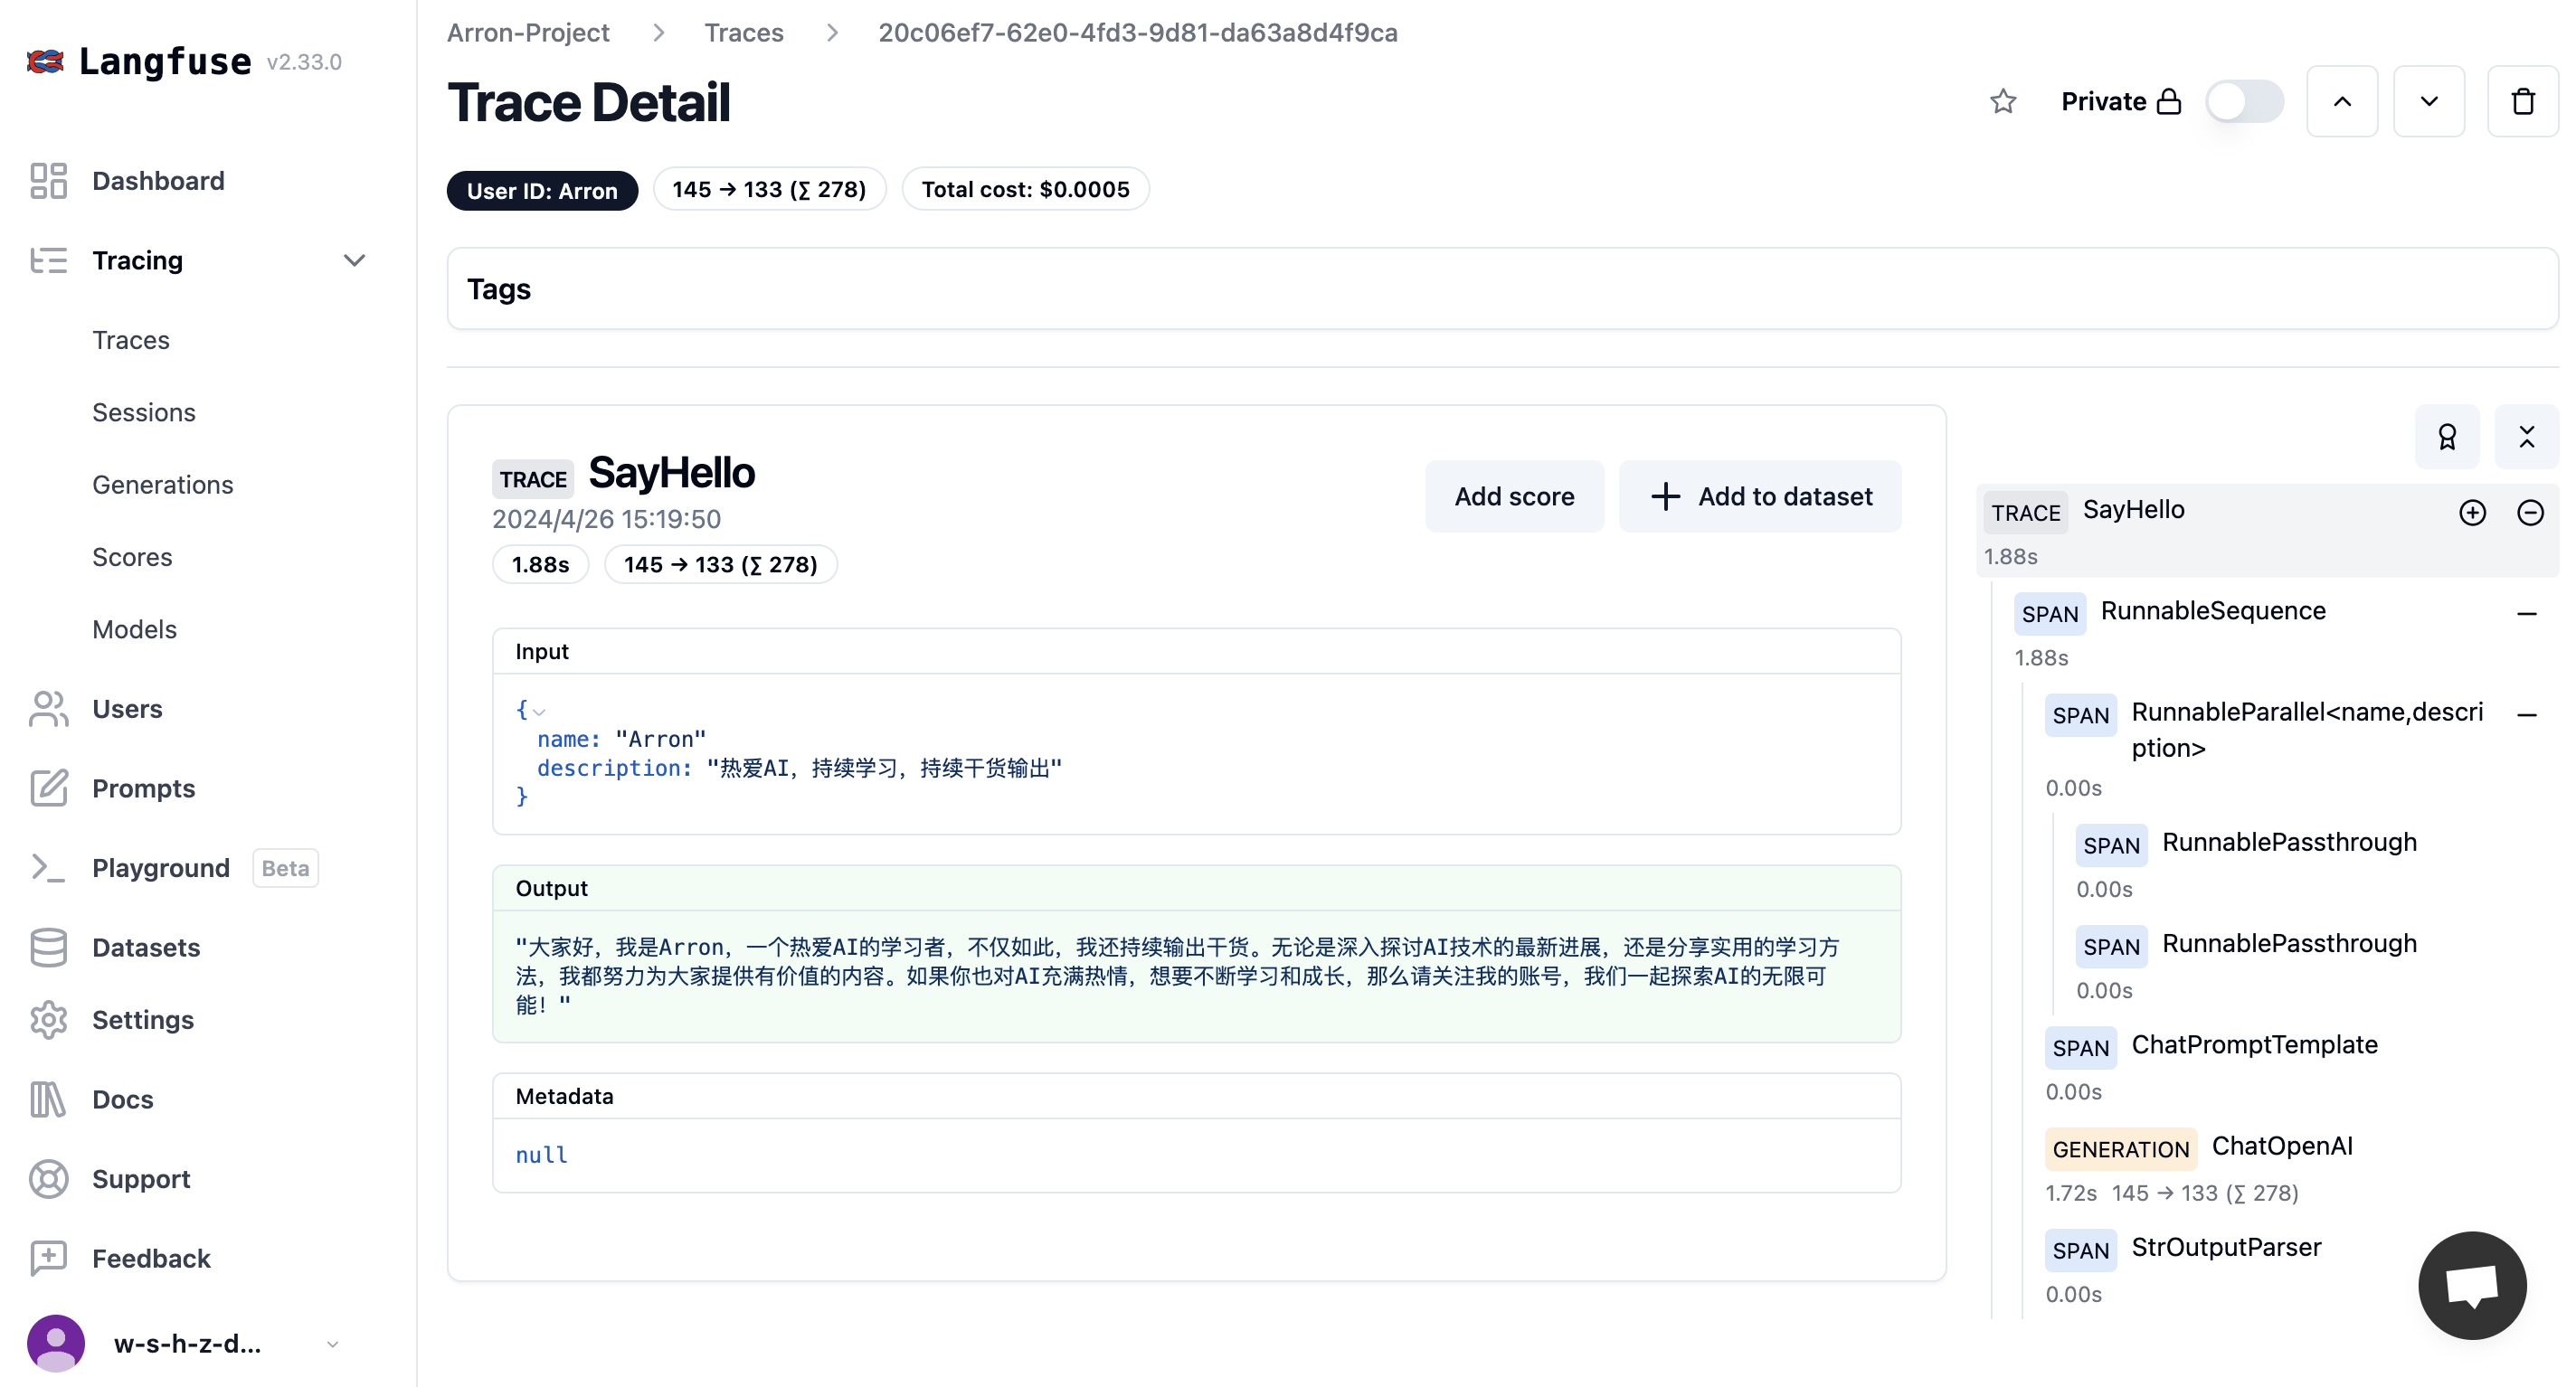

有了这个页面，你可以轻易的跟踪输入输出是否有问题，哪一步有问题，从而更好的调优你的程序。这个比自己打日志的信息更详细和更好用多了。